## Sonar Data with Binary Logistic Regression

*Binary logistic regression* models the relationship between a set of predictors and a binary response variable. A binary response has only two possible values, such as 0 or 1. Use a binary regression model to understand how changes in the predictor values are associated with changes in the probability of an event occurring.

## Problem description

The file “dataminesrocks.csv” contains 208 patterns obtained by 1)bouncing sonar signals off a metal cylinder at various angles and under various conditions, and 2) from bouncing sonar signals off rocks under similar conditions. The transmitted sonar signal is a frequency-modulated chirp, rising in frequency. The data set contains signals obtained from a variety of different aspect angles, spanning 90 degrees for the cylinder and 180 degrees for the rock.

Each pattern is a set of 60 features in the range 0.0 to 1.0. Each feature representing the energy within a particular frequency band, integrated over a certain period of time. 

The label associated with each record contains "Rock" or "Mine".

Three trained human subjects were each tested on 100 signals, chosen at random from the set of 208 returns used to create this data set. Their responses ranged between 88% and 97% correct. However, they may have been using information from the raw sonar signal that is not preserved in the processed data sets presented here.

Can we design a model that improves the above performance?

References: 

https://datahub.io/machine-learning/sonar#readme

https://www.openml.org/d/40

### Importing libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing data set

In [4]:
dataset=pd.read_csv("dataminerocks.csv")
dataset.head()

,Unnamed: 0,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,1,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,2,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,3,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,4,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,5,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock


### Determining the balance on the binary response

In [5]:
occurrences = dataset['Class'].value_counts(normalize=True)
print(occurrences)

Mine    0.533654
Rock    0.466346
Name: Class, dtype: float64


In [6]:
# Percent of Mines
percMines=111/(111+97)*100
print(percMines)

53.36538461538461


In [7]:
#Percent of Rocks
percRocks=97/(111+97)*100
print(percRocks)

46.63461538461539


### Label encoding the response variable

In [8]:
# Encoding dependent variable using label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset["Class"]=le.fit_transform(dataset["Class"])
print(dataset["Class"])

0      1
1      1
2      1
3      1
4      1
      ..
203    0
204    0
205    0
206    0
207    0
Name: Class, Length: 208, dtype: int64


### Create y and X

In [9]:
X=dataset.iloc[:, :-1].values
y=dataset.iloc[:, -1].values

In [10]:
# print(X)
# print(y)

### Spliting data into training and test sets

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.25, random_state = 0) #Setting stratify to the target y.

### Feature scaling

In [12]:
#For logistic regression is not necessary BUT, it tends to enhance performance.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc=sc_X
X_train = sc_X.fit_transform(X_train)
X_test =sc_X.transform(X_test) #Not fit_transform to avoid information leakage

In [13]:
#print(X_train)

In [14]:
#print(X_test)

### Creating logistic regression model on training set

In [15]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Predict test results

In [16]:
#Predicting values for X_test data
classifier.predict(X_test)

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1])

In [17]:
print(classifier.predict(X_test))

[1 0 0 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1
 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1]


In [18]:
#y_pred is the name of the predicted X_test data and y-test is the real result for X_test data.
y_pred = classifier.predict(X_test)
np.set_printoptions(precision=0)
print('Print of pairs [y_pred, y_test] for visual comparison: \n',np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

Print of pairs [y_pred, y_test] for visual comparison: 
 [[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]]


### Calculating the confusion matrix

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[28,  0],
       [ 1, 23]])

In [20]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(28, 0, 1, 23)

### Plotting the confusion matrix

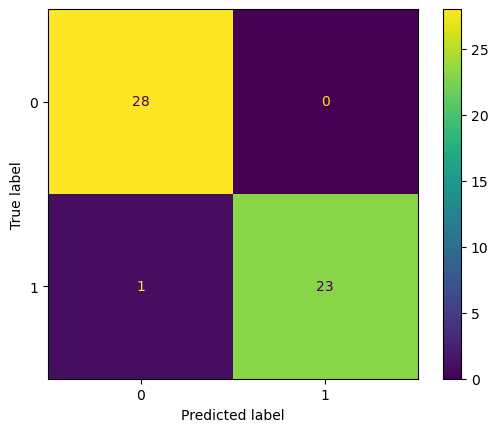

In [21]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier.fit(X_train, y_train), X_test, y_test)
plt.show()

### Calculation of accuracy

Accuracy estimates the number of correct predictions among the total number of predictions made.

In [22]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred)*100
acc_2dec="{:.2f}".format(acc)
print("The accuracy of the model is:", acc_2dec)

The accuracy of the model is: 98.08


Using the formula for accuracy: $acc=\frac{t_p+t_n}{t_p+f_p+t_n+f_n}$

In [23]:
acc2=(tp+tn)/(tp+fp+tn+fn)*100
print("Accuracy by formula: ", "{:.2f}".format(acc2))

Accuracy by formula:  98.08


### Plot ROC and obtain AUC
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: True Positive Rate. False Positive Rate.

AUC stands for "Area under the ROC Curve." 

AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

AUC is desirable for the following two reasons:

AUC is scale-invariant. It measures how well predictions are ranked, rather than their absolute values.
AUC is classification-threshold-invariant. It measures the quality of the model's predictions irrespective of what classification threshold is chosen.

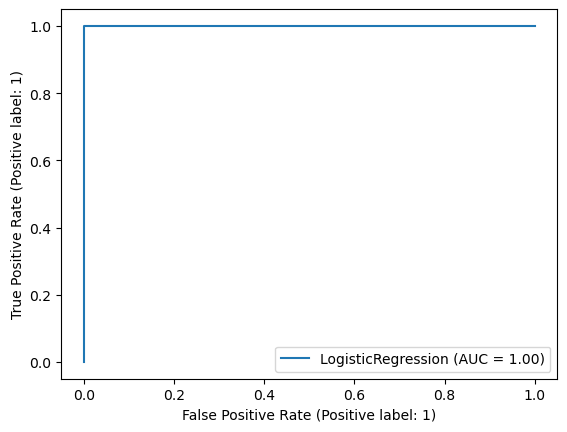

In [24]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier.fit(X_train, y_train), X_test, y_test)
plt.show()  

### Precision score

Precision answer the question: Of all the cases that the model PREDICTED as TRUE (positive), what percent was actually TRUE (positive). This is, what is the fraction of positives that were classified correctly.

Using the values from the confusion matrix: $precision=\frac{t_p}{t_p+f_p}$

In [25]:
from sklearn.metrics import precision_score
pre1=precision_score(y_test, y_pred)*100
print("Precision value: ", "{:.2f}".format(pre1))

Precision value:  100.00


In [26]:
pre=(tp/(tp+fp))*100
print("Precision by formula: " "{:.2f}".format(pre))

Precision by formula: 100.00


### Recall score

Recall answers the question: Of all the cases that were actually TRUE (positive), how many did the model "catch" or predict as TRUE (positive).

Recall is calculated using the confusion matrix: $recall=\frac{t_p}{t_p+f_n}$

In [27]:
from sklearn.metrics import recall_score
rec=recall_score(y_test, y_pred)*100
print("Recall value: ", "{:.2f}".format(rec))

Recall value:  95.83


In [28]:
rec1=tp/(tp+fn)*100
print("Recall by formula: ", "{:.2f}".format(rec1))

Recall by formula:  95.83


### F1 score

$F1 = 2\frac{(precision * recall)}{(precision + recall)}$ is the *harmonic mean* of precision and recall. 
It can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal.

In [29]:
from sklearn.metrics import f1_score
F1=f1_score(y_test, y_pred)
print("F1 Score: ","{:.2f}".format(F1))

F1 Score:  0.98


Note: When true positive + false positive == 0, precision is undefined. When true positive + false negative == 0, recall is undefined. In such cases, by default the metric will be set to 0, as will the F-score, and UndefinedMetricWarning will be raised. This behavior can be modified with zero_division.